In [1]:
import commons


# this is a list of features which are used in the Project Security Awareness Score
features = [
    'If an open-source project has a security policy',
    'If an open-source project has a security team',
    'If a project uses verified signed commits'
]

class TestVector(commons.BaseTestVector):
        
    def __init__(self, alias = ''):
        super().__init__(features, alias)

    def has_security_policy(self, value):
        return self.set('If an open-source project has a security policy', value)

    def has_security_team(self, value):
        return self.set('If an open-source project has a security team', value)
    
    def uses_signed_commits(self, value):
        return self.set('If a project uses verified signed commits', value)


test_vector_list = commons.TestVectorList(features)

In [2]:
all_unknown_values = TestVector().score_from(0.0).score_to(0.1)
test_vector_list.register(all_unknown_values)

test_vector_list.register(
    TestVector()
        .has_security_policy(False)
        .has_security_team(False)
        .uses_signed_commits(False)
        .score_from(0.0)
        .score_to(1.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(True)
        .has_security_team(True)
        .uses_signed_commits(False)
        .score_from(6.0)
        .score_to(8.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(False)
        .has_security_team(True)
        .uses_signed_commits(True)
        .score_from(5.0)
        .score_to(7.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(False)
        .has_security_team(True)
        .uses_signed_commits(False)
        .score_from(4.0)
        .score_to(6.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(True)
        .has_security_team(False)
        .uses_signed_commits(False)
        .score_from(3.0)
        .score_to(5.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(False)
        .has_security_team(False)
        .uses_signed_commits(True)
        .score_from(2.0)
        .score_to(4.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(True)
        .has_security_team(False)
        .uses_signed_commits(True)
        .score_from(5.0)
        .score_to(7.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(True)
        .has_security_team(True)
        .uses_signed_commits(True)
        .score_from(9.0)
        .score_to(10.0)
)

registered: test_vector_0
registered: test_vector_1
registered: test_vector_2
registered: test_vector_3
registered: test_vector_4
registered: test_vector_5
registered: test_vector_6
registered: test_vector_7
registered: test_vector_8


In [3]:
test_vector_list.check()

In [4]:
# define test vectors
test_vectors = test_vector_list.make_data_frame()

# store the test vectors to a CSV file
filename = '../../../resources/com/sap/sgs/phosphor/fosstars/model/score/oss/ProjectSecurityAwarenessScoreTestVectors.csv'
test_vectors.to_csv(filename)

# print out the test vectors
test_vectors

,If a project uses verified signed commits,If an open-source project has a security policy,If an open-source project has a security team,alias,label,score_from,score_to
0,unknown,unknown,unknown,test_vector_0,None,0.0,0.1
1,False,False,False,test_vector_1,None,0.0,1.0
2,False,True,True,test_vector_2,None,6.0,8.0
3,True,False,True,test_vector_3,None,5.0,7.0
4,False,False,True,test_vector_4,None,4.0,6.0
5,False,True,False,test_vector_5,None,3.0,5.0
6,True,False,False,test_vector_6,None,2.0,4.0
7,True,True,False,test_vector_7,None,5.0,7.0
8,True,True,True,test_vector_8,None,9.0,10.0


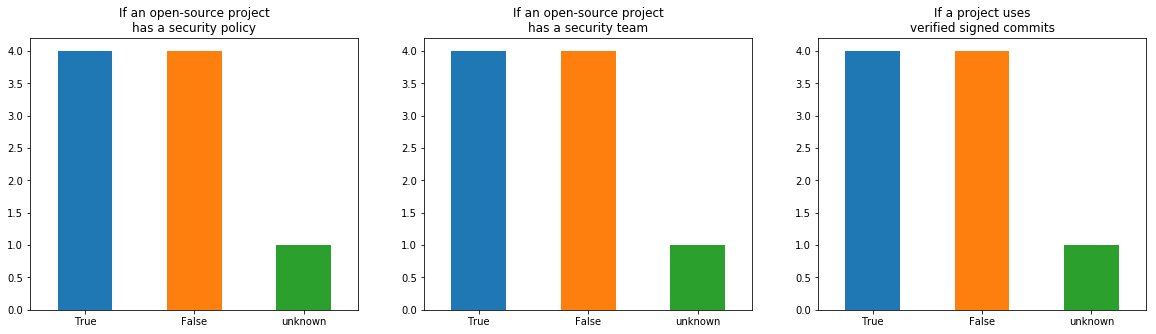

In [5]:
commons.draw_hists(features, test_vectors)